In [4]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad,dblquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Martín Calvo
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






El valor obtenido con Cuadratura Gaussiana es 1.5920977
---------------------------------------------------------------------------------------------
La integral calculada con el método de Simpson 1/3 y una h = 0.1 es  igual a 1.054579
El error absoluto al compararla con la función quad es de 0.537519
La integral calculada con el método de Trapezoide y una h = 0.1 es  igual a 1.071146
El error absoluto al compararla con la función quad es de 0.520952
---------------------------------------------------------------------------------------------
La integral calculada con el método de Simpson 1/3 y una h = 0.01 es  igual a 1.552257
El error absoluto al compararla con la función quad es de 0.039841
La integral calculada con el método de Trapezoide y una h = 0.01 es  igual a 1.552493
El error absoluto al compararla con la función quad es de 0.039605
---------------------------------------------------------------------------------------------
La integral calculada con el método de Simpson 1/3

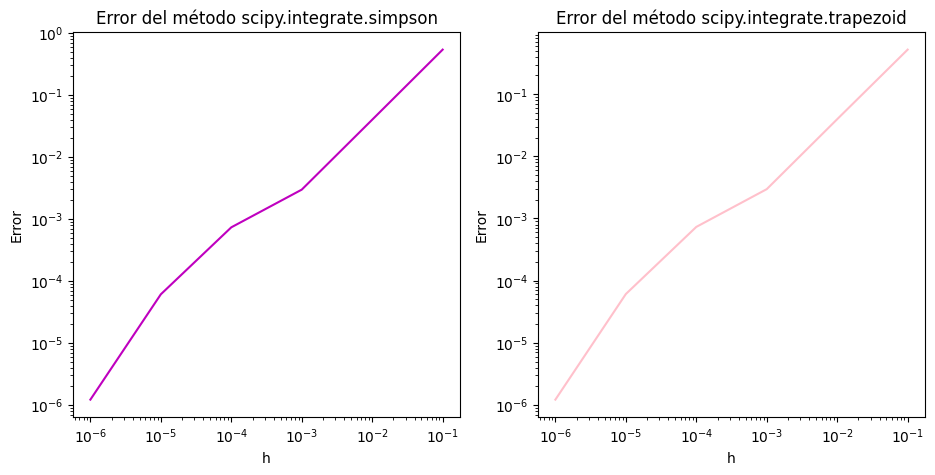

---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n = 1 (Lo que significa una h de 0.785398) es 0.976272
El error absoluto al compararla con la función quad es de 0.6158260654018
---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n = 3001 (Lo que significa una h de 0.000262) es 1.592098
El error absoluto al compararla con la función quad es de 0.0000000000002
---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n = 6001 (Lo que significa una h de 0.000131) es 1.592098
El error absoluto al compararla con la función quad es de 0.0000000000011
---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n =

Text(0.5, 1.0, 'Error del método scipy.integrate.fixed_quad')

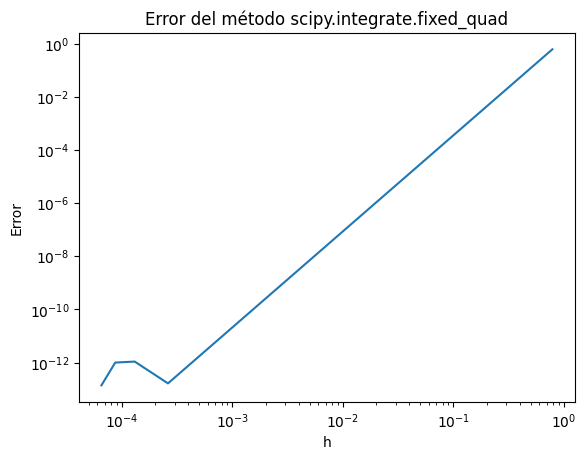

In [ ]:
funcion1=lambda x: np.exp(3*x)*np.sin(x)
a1=0
b1=np.pi/4

h=np.logspace(-1,-6,6)

integral1simpson=[]  #La Integral evaluada para cada h con simpson
integral1trap=[] #La Integral evaluada para cada h con trapezoid
error1trap=[]   #los errores respectivos
error1simpson=[]

for i in h:
  x=np.arange(a1,b1,i) #al modificar el último elemento en el arange se está modificando el h, porque se dice de cuánto debe ser cada partición
  y=funcion1(x)

  integral1simpson.append(simpson(y,x))
  integral1trap.append(trapezoid(y,x))


Real1=quad(funcion1,a1,b1)[0]


print(f"El valor obtenido con Cuadratura Gaussiana es {Real1:.7f}")
for i in range(0,len(h)):
  error1simpson.append(abs(integral1simpson[i]-Real1))
  error1trap.append(abs(integral1trap[i]-Real1))
  print("---------------------------------------------------------------------------------------------")
  print(f"La integral calculada con el método de Simpson 1/3 y una h = {h[i]} es  igual a {integral1simpson[i]:.6f}")
  print(f"El error absoluto al compararla con la función quad es de {error1simpson[i]:.6f}")
  print(f"La integral calculada con el método de Trapezoide y una h = {h[i]} es  igual a {integral1trap[i]:.6f}")
  print(f"El error absoluto al compararla con la función quad es de {error1trap[i]:.6f}")

fig, ax= plt.subplots(1,2, figsize=(11,5))

ax[0].loglog(h,error1simpson, color="m")
ax[0].set_title("Error del método scipy.integrate.simpson")
ax[0].set_xlabel("h")
ax[0].set_ylabel("Error")

ax[1].loglog(h,error1trap, color="pink")
ax[1].set_title("Error del método scipy.integrate.trapezoid")
ax[1].set_xlabel("h")
ax[1].set_ylabel("Error")
plt.show()


n=np.arange(1,12002,3000)
integral1fixed=[]
error1fixed=[]
for i in range(len(n)):
  integral1fixed.append((fixed_quad(funcion1,a1,b1,n=n[i]))[0])
  error1fixed.append(abs(Real1-integral1fixed[i]))
  print("---------------------------------------------------------------------------------------------------------")
  print(f"La integral calculada con fixed quad con una n = {n[i]} (Lo que significa una h de {(b1-a1)/n[i]:.6f}) es {integral1fixed[i]:.6f}")
  print(f"El error absoluto al compararla con la función quad es de {error1fixed[i]:.13f}")

h=(b1-a1)/n
plt.loglog(h,error1fixed)
plt.ylabel("Error")
plt.xlabel("h")
plt.title("Error del método scipy.integrate.fixed_quad")

El valor obtenido con Cuadratura Gaussiana es 0.2725139
-----------------------------------------------------------------------------------------------------------
La integral calculada con el método de Simpson 1/3 y una h = 0.1 es  igual a 0.251536
El error absoluto al compararla con la función quad es de 0.0209781
La integral calculada con el método de Trapezoide y una h = 0.1 es  igual a 0.251674
El error absoluto al compararla con la función quad es de 0.0208403
-----------------------------------------------------------------------------------------------------------
La integral calculada con el método de Simpson 1/3 y una h = 0.01 es  igual a 0.270461
El error absoluto al compararla con la función quad es de 0.0020528
La integral calculada con el método de Trapezoide y una h = 0.01 es  igual a 0.270463
El error absoluto al compararla con la función quad es de 0.0020513
-----------------------------------------------------------------------------------------------------------
La i

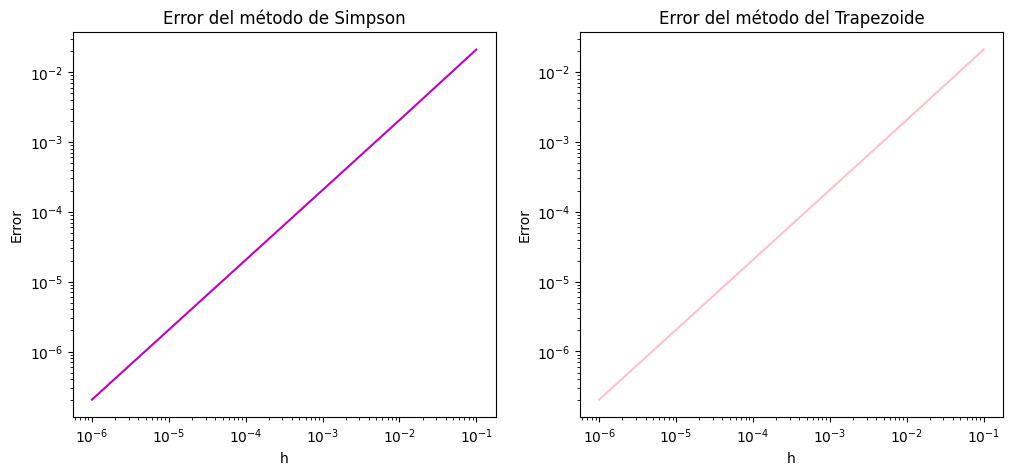

---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n = 1 (Lo que significa una h de 1.000000) es 0.265839
El error absoluto al compararla con la función quad es de 0.006675288074306
---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n = 3001 (Lo que significa una h de 0.000333) es 0.272514
El error absoluto al compararla con la función quad es de 0.000000000000002
---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con una n = 6001 (Lo que significa una h de 0.000167) es 0.272514
El error absoluto al compararla con la función quad es de 0.000000000000011
---------------------------------------------------------------------------------------------------------
La integral calculada con fixed quad con u

Text(0.5, 1.0, 'Error del método scipy.integrate.fixed_quad')

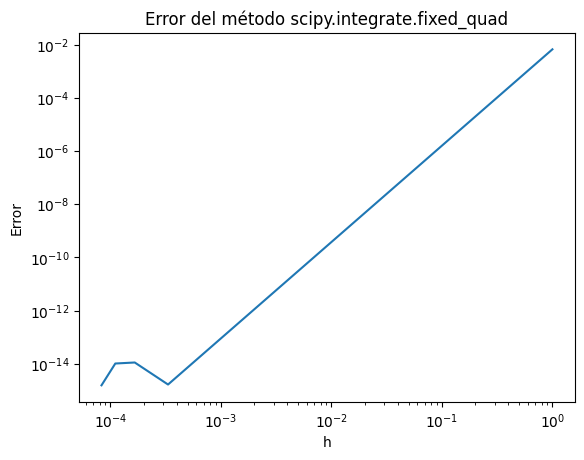

In [ ]:
funcion2=lambda x: 1/(x*np.log(x)) #Volví a hacer todo exactamente igual que para la función 1 pero cambiando sustituyendo por la función 2
a2=np.e
b2=1+np.e

h=np.logspace(-1,-6,6)

ache=[]
integral2simpson=[]
integral2trap=[]
error2trap=[]
error2simpson=[]

for i in h:
  x=np.arange(a2,b2,i)
  y=funcion2(x)

  integral2simpson.append(simpson(y,x))
  integral2trap.append(trapezoid(y,x))

Real2=quad(funcion2,a2,b2)[0]


print(f"El valor obtenido con Cuadratura Gaussiana es {Real2:.7f}")
for i in range(0,len(h)):
  error2simpson.append(abs(integral2simpson[i]-Real2))
  error2trap.append(abs(integral2trap[i]-Real2))
  print("-----------------------------------------------------------------------------------------------------------")
  print(f"La integral calculada con el método de Simpson 1/3 y una h = {h[i]} es  igual a {integral2simpson[i]:.6f}")
  print(f"El error absoluto al compararla con la función quad es de {error2simpson[i]:.7f}")
  print(f"La integral calculada con el método de Trapezoide y una h = {h[i]} es  igual a {integral2trap[i]:.6f}")
  print(f"El error absoluto al compararla con la función quad es de {error2trap[i]:.7f}") #Le puse un poquito más al error para que apareciera el último decimal

fig, ax= plt.subplots(1,2, figsize=(12,5))

ax[0].loglog(h,error2simpson, color="m")
ax[0].set_title("Error del método de Simpson")
ax[0].set_xlabel("h")
ax[0].set_ylabel("Error")

ax[1].loglog(h,error2trap, color="pink")
ax[1].set_title("Error del método del Trapezoide")
ax[1].set_xlabel("h")
ax[1].set_ylabel("Error")
plt.show()



n=np.arange(1,12002,3000)
integral2fixed=[]
error2fixed=[]
for i in range(len(n)):
  integral2fixed.append((fixed_quad(funcion2,a2,b2,n=n[i]))[0])
  error2fixed.append(abs(Real2-integral2fixed[i]))
  print("---------------------------------------------------------------------------------------------------------")
  print(f"La integral calculada con fixed quad con una n = {n[i]} (Lo que significa una h de {(b2-a2)/n[i]:.6f}) es {integral2fixed[i]:.6f}")
  print(f"El error absoluto al compararla con la función quad es de {error2fixed[i]:.15f}")

h=(b2-a2)/n
plt.loglog(h,error2fixed)
plt.ylabel("Error")
plt.xlabel("h")
plt.title("Error del método scipy.integrate.fixed_quad")

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tplquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
f=lambda z,y,x: (1/y)*np.sin(z/y)

def integral_z(y,x):
  integrando=lambda z:(1/y)*np.sin(z/y) #Las que van dentro del def son las que se mantienen constantes, la del lambda adentro es la que va a variar
  return quad(integrando,0, x*y)[0]

def integral_y(x):
  integrando=lambda y: integral_z(y,x)
  return quad(integrando,0,x)[0]

resultado=quad(integral_y,0,np.pi)[0]

limsupz= lambda x,y: x*y
liminfz=lambda x,y:0
limsupy=lambda x:x
liminfy=lambda x:0  #Quería definir las internas como funciones así no hiciera falta
limsupx=np.pi
liminfx=0
restquad=tplquad(f,liminfx,limsupx,liminfy,limsupy,liminfz,limsupz)[0]

print(f"El resultado usando quad y anidando las funciones es {resultado}")
print(f"El resultado usando la función tplquad es {restquad}")

El resultado usando quad y anidando las funciones es 6.934802200544679
El resultado usando la función tplquad es 6.934802200544679


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
def gauss_quad_standard(func,a,b, n):
  """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - a: Límite inferior.
    - b: Límite superior.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
  """
  #Hay que hacer un cambio de variable para que la x de ese momento sea una función tal que u(-1)=a y u(1)=b
  #revisando la documentación del curso esta función es (b-a)x/2 + (b+a)/2, y el diferencial es (b-a)/2

  # Obtener raíces y pesos del polinomio de (Legendre)
  x, w = roots_legendre(n)
  #print(x)
  # Evaluar la suma ponderada
  integral =0
  integral = ((b-a)/2)*np.sum(w  * func(((-a/2 + b/2)*x + a/2 + b/2)))
  return integral

funcion1=lambda x: np.exp(3*x)*np.sin(x)
gauss_quad_standard(funcion1,0,np.pi/4,5)

np.float64(1.592097712179058)

In [ ]:
f=lambda z,y,x: (1/y)*np.sin(z/y)

def integral_z(y,x):
  integrando=lambda z:(1/y)*np.sin(z/y) #Las que van dentro del def son las que se mantienen constantes, la del lambda adentro es la que va a variar
  return gauss_quad_standard(integrando,0, x*y,10)

def integral_y(x):
  integrando=lambda y: integral_z(y,x)
  return gauss_quad_standard(integrando,0,x,10)

resultado=gauss_quad_standard(integral_y,0,np.pi,10)

print(f"El resultado usando quad y anidando las funciones es {resultado}")




El resultado usando quad y anidando las funciones es 9.107331966336744


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [2]:
def trapezoid_error(f,a,b,epsilon):
  """
  Garantiza que la función trapezoid  tenga un error determinado, comparándolas con una iteración previa
  f es la función que se va a integrar
  a y b son los límites de integración
  epsilon es la tolerancia
  """
  h=50
  hache=100
  while True:
    r=np.linspace(a,b,h)
    erre=np.linspace(a,b,hache)
    if abs(trapezoid(f(r),r)-trapezoid(f(erre),erre))<epsilon:
      return trapezoid(f(erre),erre)
    h=hache
    hache*=10
def simpson_error(f,a,b,epsilon):
  """
  Garantiza que la función trapezoid  tenga un error determinado, comparándolas con una iteración previa
  f es la función que se va a integrar
  a y b son los límites de integración
  epsilon es la tolerancia
  """
  h=50
  hache=100
  iter=1
  while True:
    r=np.linspace(a,b,h)
    erre=np.linspace(a,b,hache)
    if abs(simpson(f(r),r)-trapezoid(f(erre),erre))<epsilon:
      return simpson(f(erre),erre)
    h=hache
    hache*=10
    iter+=1

In [8]:
f=lambda x: 1/((np.tan(x))**(1/2))
g=lambda x: np.cos(x)/(x**3)
h=lambda y: 1/((1-y**2)**(1/2)) #esa tercera integral tiene los diferenciales en orden distinto a como se evaluarían las funciones, no se puede resolver como está escrita
sero=1e-5

trapf=trapezoid_error(f,sero, np.pi/2-sero, 1e-5)
simpf=simpson_error(f,sero, np.pi/2-sero, 1e-5)
quadf=quad(f,sero,np.pi/2-sero)

trapg=trapezoid_error(g,1, 10000, 1e-5)
simpg=simpson_error(g,1, 10000, 1e-5)
quadg=quad(g,1,np.inf)



1) Con Trapezoidal la integral vale 2.21512, con Simpson vale 2.21512 y con quad vale 2.21512
2) Con Trapezoidal la integral vale 0.01812, con Simpson vale 0.01812 y con quad vale 0.01812


/tmp/ipython-input-8-682521940.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quadg=quad(g,1,np.inf)


In [15]:
print(f"1) Con Trapezoidal la integral vale {trapf:.6f}, con Simpson vale {simpf:.6f} y con quad vale {quadf[0]:.6f}")
print(f"2) Con Simpson la integral vale {trapg:.6f}, con Simpson vale {simpg:.6f} y con quad vale {quadg[0]:.6f}")
print("3) Esa tercera integral está mal planteada y voy a usar eso como excusa para no hacerla")

1) Con Trapezoidal la integral vale 2.215117, con Simpson vale 2.215117 y con quad vale 2.215117
2) Con Simpson la integral vale 0.018118, con Simpson vale 0.018118 y con quad vale 0.018118
3) Esa tercera integral está mal planteada y voy a usar eso como excusa para no hacerla
